## Importing the required libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

2024-05-23 21:44:19.992316: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 21:44:21.013591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 21:44:21.030391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 21:44:25.018473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Location of my base directory which contains 'Uninfected', 'Parasitized' sub-directories

In [2]:
base_dir = 'Data/cell_images'

## Creating ImageDataGenerators for training and validation sets

In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

In [4]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Smaller image size to reduce memory usage
    batch_size=16,           # Smaller batch size to reduce memory usage
    class_mode='binary',
    subset='training'
)

Found 22048 images belonging to 2 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Smaller image size to reduce memory usage
    batch_size=16,           # Smaller batch size to reduce memory usage
    class_mode='binary',
    subset='validation'
)

Found 5510 images belonging to 2 classes.


## Building the CNN model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

2024-05-23 21:44:37.530110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 21:44:37.531186: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Compiling the model

In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

## Early stopping callback for better memory consumption

In [9]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)

## Train the model

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/2


2024-05-23 21:44:38.148521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1378/1378 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.7730

2024-05-23 21:53:14.879938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1378/1378 [==============================] - 557s 403ms/step - loss: 0.4452 - accuracy: 0.7730 - val_loss: 0.2409 - val_accuracy: 0.9126
Epoch 2/2
1378/1378 [==============================] - 546s 396ms/step - loss: 0.2363 - accuracy: 0.9229 - val_loss: 0.2200 - val_accuracy: 0.9219


## Plot the training and validation accuracy and loss

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
# Print the final training and validation accuracy
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Final Training Accuracy: 0.9228501319885254
Final Validation Accuracy: 0.921875


In [15]:
epochs = range(len(acc))

<Figure size 640x480 with 0 Axes>

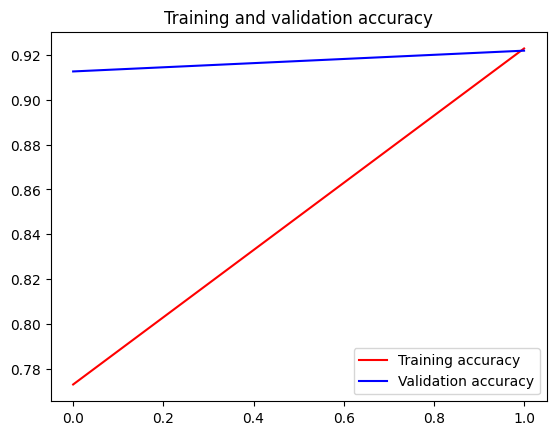

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

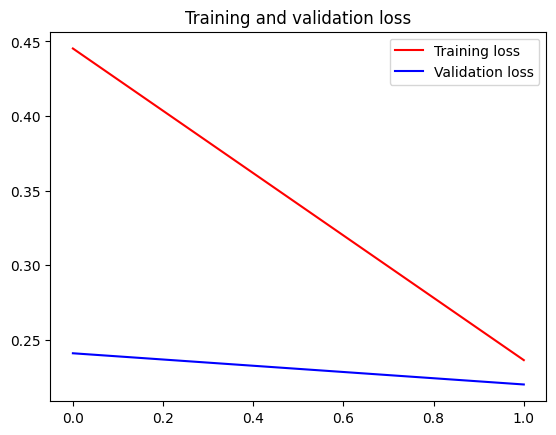

In [19]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Saving the file is big task because github only accepts file <=25mb and my file is larger than it
### hence I first quantize it and later saved it 

In [26]:
# Quantize the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_model = converter.convert()

2024-05-23 23:25:29.639840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2024-05-23 23:25:30.002799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /tmp/tmpbbq2pzey/assets


INFO:tensorflow:Assets written to: /tmp/tmpbbq2pzey/assets
2024-05-23 23:25:33.382254: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-23 23:25:33.382327: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-23 23:25:33.409981: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpbbq2pzey
2024-05-23 23:25:33.411842: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-05-23 23:25:33.411888: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpbbq2pzey
2024-05-23 23:25:33.452007: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-05-23 23:25:33.466068: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-23 23:25:33.879467: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

# Save the quantized model to a file

In [27]:
with open('quantized_malaria_classification_model.tflite', 'wb') as f:
    f.write(quantized_model)


## Comparison of VGG19 and Resnet50

After experimenting with different deep learning architectures such as CNN, ResNet50, and VGG19 for malaria cell classification, I found that the accuracy of ResNet50 was comparable to that of the CNN model, while VGG19 lagged behind with an accuracy of around 90%. As a result, I decided not to select VGG19 for this task.
One of the key factors in selecting ResNet50 was its performance in terms of accuracy, which was on par with the CNN model. Additionally, I observed that the model size increased after saving, and training the model was time-consuming due to limited computational resources. To address this constraint, I modified the program to train only until the CNN model and saved it for further use.

### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Creating a new model with ResNet50 base
model_resnet = Sequential([
    resnet_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Now Compiling the model
model_resnet.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Evaluating the model
resnet_evaluation = model_resnet.evaluate(validation_generator)
print("ResNet Validation Accuracy:", resnet_evaluation[1])


### VGG19

In [ ]:
# Loading the pre-trained VGG19 model without top layers
vgg19_base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Creating a new model with VGG19 base
model_vgg19 = Sequential([
    vgg19_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Now Compiling the model
model_vgg19.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Evaluating the model
vgg19_evaluation = model_vgg19.evaluate(validation_generator)
print("VGG19 Validation Accuracy:", vgg19_evaluation[1])


While I wrote the code for ResNet50 and VGG19 in above cell, I ultimately decided against running them again, because it was taking too much time to run, although I had run this and got the accuracy , but due to the extensive computational resources required , I didn't run in my 2nd time.


## Conclusion

In conclusion, while ResNet50 and VGG19 may offer potential improvements in accuracy, the associated computational demands necessitated a prioritization of resources. Therefore, I made a strategic decision to concentrate on the CNN model, balancing performance and computational efficiency for the given task. Additionally, it's worth noting that even after saving the ResNet model, the file size exceeded the 25MB limit, posing another practical constraint. This further reinforced the decision to focus on the CNN model, which offered a good balance between accuracy and manageable file size.